In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans

In [2]:
world = pd.read_csv("world.csv")
world

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.042,32.4%,5102150.3,Botswana,6.0,66.0,409969.8,"$22,568,793,525",0.074,"$1,632",...,42.9,1.4,1,0.275,0.697,0.041,1519155,0.867,"$8,577,000,000","$704,000,000"
1,0.025,63.5%,2091377.5,Syrian Arab Republic,37.0,184.0,1200867.8,"$183,477,522,124",0.037,"$4,914",...,77.6,1.7,1,0.440,0.844,0.032,7012977,0.163,"$37,166,000,000","$404,000,000"
2,0.035,66.0%,3700837.2,Ecuador,44.0,77.0,2406610.8,"$5,494,252,208",0.221,"$7,180",...,58.5,2.3,1,0.317,0.743,0.121,5373054,0.597,"$3,000,000","$3,946,000,000"
3,0.012,44.6%,3242594.3,French Polynesia,110.0,175.0,511453.7,"$225,426,789,027",0.206,$128,...,83.8,0.3,1,0.412,0.621,0.185,1230985,0.946,"$1,623,000,000","$8,382,000,000"
4,0.012,55.4%,6350202.9,Cote d'Ivoire,72.0,18.0,1273730.2,"$526,425,740",0.115,"$3,624",...,82.9,0.5,1,0.261,0.642,0.090,6183484,0.961,"$676,000,000","$12,213,000,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100988,0.018,66.3%,6342826.0,Grenada,60.0,47.0,1093798.9,"$18,262,773,766",0.057,$681,...,77.1,0.8,1,0.209,0.570,0.125,12238791,0.770,"$2,340,000,000","$40,500,000"
100989,0.045,65.6%,5277509.2,Iceland,192.0,29.0,1634567.8,"$1,537,753,885",0.097,$622,...,65.8,1.9,1,0.303,0.702,0.032,1577984,0.805,"$51,000,000","$10,689,000,000"
100990,0.043,38.7%,7296390.0,American Samoa,115.0,107.0,2315448.4,"$25,978,563,316",0.186,$92,...,40.9,2.1,1,0.345,0.492,0.186,6689700,0.626,"$109,000,000","$22,787,000,000"
100991,0.047,25.3%,4842121.8,Kazakhstan,89.0,137.0,703589.0,"$161,207,304,960",0.151,"$3,624",...,82.6,2.1,1,0.431,0.606,0.033,32126351,0.624,"$639,000,000","$804,000,000"


In [3]:
world.describe()

,Birth Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,Health Exp % GDP,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban
count,100993.000000,1.009930e+05,100993.000000,100993.000000,1.009930e+05,100993.000000,100993.000000,100993.000000,100993.000000,100993.0,100993.000000,100993.000000,100993.000000,1.009930e+05,100993.000000
mean,0.030024,4.148041e+06,78.612023,94.772073,1.360708e+06,0.116672,62.546341,62.536058,1.270873,1.0,0.308666,0.665432,0.123669,3.133055e+07,0.541338
std,0.013283,2.394530e+06,76.655346,54.607799,7.900350e+05,0.062631,14.703907,14.726188,0.786363,0.0,0.110340,0.111035,0.069548,1.243158e+08,0.265155
min,0.007000,3.490000e+01,1.000000,1.000000,3.590000e+01,0.008000,37.000000,37.000000,0.000000,1.0,0.118000,0.474000,0.003000,1.887600e+04,0.082000
25%,0.018000,2.064675e+06,32.000000,48.000000,6.743004e+05,0.063000,49.900000,49.800000,0.600000,1.0,0.213000,0.570000,0.064000,9.432870e+05,0.312000
50%,0.030000,4.153750e+06,64.000000,94.000000,1.359661e+06,0.117000,62.600000,62.600000,1.300000,1.0,0.308000,0.664000,0.124000,5.865491e+06,0.541000
75%,0.042000,6.222310e+06,105.000000,142.000000,2.046570e+06,0.171000,75.300000,75.300000,1.900000,1.0,0.404000,0.762000,0.184000,2.010394e+07,0.771000
max,0.053000,8.286859e+06,694.000000,189.000000,2.727718e+06,0.225000,88.000000,88.000000,2.900000,1.0,0.500000,0.858000,0.244000,1.350695e+09,1.000000


In [4]:
world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100993 entries, 0 to 100992
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Birth Rate              100993 non-null  float64
 1   Business Tax Rate       100993 non-null  object 
 2   CO2 Emissions           100993 non-null  float64
 3   Country                 100993 non-null  object 
 4   Days to Start Business  100993 non-null  float64
 5   Ease of Business        100993 non-null  float64
 6   Energy Usage            100993 non-null  float64
 7   GDP                     100993 non-null  object 
 8   Health Exp % GDP        100993 non-null  float64
 9   Health Exp/Capita       100993 non-null  object 
 10  Life Expectancy Female  100993 non-null  float64
 11  Life Expectancy Male    100993 non-null  float64
 12  Mobile Phone Usage      100993 non-null  float64
 13  Number of Records       100993 non-null  int64  
 14  Population 0-14     

In [5]:
world.isnull

<bound method DataFrame.isnull of         Birth Rate Business Tax Rate  CO2 Emissions               Country  \
0            0.042             32.4%      5102150.3              Botswana   
1            0.025             63.5%      2091377.5  Syrian Arab Republic   
2            0.035             66.0%      3700837.2               Ecuador   
3            0.012             44.6%      3242594.3      French Polynesia   
4            0.012             55.4%      6350202.9         Cote d'Ivoire   
...            ...               ...            ...                   ...   
100988       0.018             66.3%      6342826.0               Grenada   
100989       0.045             65.6%      5277509.2               Iceland   
100990       0.043             38.7%      7296390.0        American Samoa   
100991       0.047             25.3%      4842121.8            Kazakhstan   
100992       0.011             74.2%      5811674.7            Luxembourg   

        Days to Start Business  Ease of B

In [6]:
world.sum()

Birth Rate                                                         3032.218
Business Tax Rate         32.4%63.5%66.0%44.6%55.4%68.5%97.5%50.8%49.8%4...
CO2 Emissions                                           418923083197.799988
Country                   BotswanaSyrian Arab RepublicEcuadorFrench Poly...
Days to Start Business                                            7939264.0
Ease of Business                                                  9571316.0
Energy Usage                                            137422000803.700012
GDP                       $22,568,793,525$183,477,522,124$5,494,252,208$...
Health Exp % GDP                                                  11783.054
Health Exp/Capita         $1,632$4,914$7,180$128$3,624$378$894$487$2,808...
Life Expectancy Female                                            6316742.6
Life Expectancy Male                                              6315704.1
Mobile Phone Usage                                                 128349.3
Number of Re

In [7]:
world1 = world.iloc[:,1:]

In [51]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Identify numeric columns only
numeric_cols = world1.select_dtypes(include=['number']).columns

# Handle percentage values (if any)
for col in world1.columns:
    if world1[col].dtype == 'object':  # If the column contains strings
        world1[col] = world1[col].str.replace('%', '', regex=True)  # Remove '%'
        try:
            world1[col] = world1[col].astype(float)  # Convert to float
        except ValueError:
            pass  # Skip if conversion fails (likely a non-numeric column)

# Re-select only numeric columns after conversion
numeric_cols = world1.select_dtypes(include=['number']).columns

# Apply StandardScaler only on numeric columns
scaler = StandardScaler()
scaled_values = scaler.fit_transform(world1[numeric_cols])

# Create a new DataFrame with scaled values
scaled_univ_df = pd.DataFrame(scaled_values, columns=numeric_cols)
print(scaled_univ_df.head())



   Business Tax Rate  CO2 Emissions  Days to Start Business  Ease of Business  \
0          -0.469860       0.398456               -0.947258         -0.526888   
1           0.246614      -0.858905               -0.542848          1.633986   
2           0.304208      -0.186761               -0.451530         -0.325451   
3          -0.188800      -0.378133                0.409471          1.469173   
4           0.060008       0.919668               -0.086257         -1.405888   

   Energy Usage  Health Exp % GDP  Life Expectancy Female  \
0     -1.203419         -0.681328                0.037654   
1     -0.202322         -1.272094               -1.506161   
2      1.323875          1.665768                1.465853   
3     -1.074963          1.426269               -0.805663   
4     -0.110094         -0.026696                1.289028   

   Life Expectancy Male  Mobile Phone Usage  Number of Records  \
0             -1.333417            0.164208                0.0   
1             

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
print(world1.dtypes)
numeric_cols = world1.select_dtypes(include=['number']).columns
world1_numeric = world1[numeric_cols].copy()  
world1_numeric = world1_numeric.applymap(lambda x: float(str(x).replace('%', '')) if isinstance(x, str) and '%' in x else x)
world1_numeric.fillna(world1_numeric.mean(), inplace=True)
scaler = StandardScaler()
scaled_world_df = pd.DataFrame(scaler.fit_transform(world1_numeric), columns=world1_numeric.columns)
print(scaled_world_df.head())


Business Tax Rate          object
CO2 Emissions             float64
Country                    object
Days to Start Business    float64
Ease of Business          float64
Energy Usage              float64
GDP                        object
Health Exp % GDP          float64
Health Exp/Capita          object
Life Expectancy Female    float64
Life Expectancy Male      float64
Mobile Phone Usage        float64
Number of Records           int64
Population 0-14           float64
Population 15-64          float64
Population 65+            float64
Population Total            int64
Population Urban          float64
Tourism Inbound            object
Tourism Outbound           object
dtype: object
   CO2 Emissions  Days to Start Business  Ease of Business  Energy Usage  \
0       0.398456               -0.947258         -0.526888     -1.203419   
1      -0.858905               -0.542848          1.633986     -0.202322   
2      -0.186761               -0.451530         -0.325451      1.323875   
3 

In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans.fit(scaled_world_df)
world1['Cluster'] = kmeans.labels_
print(world.head())


   Birth Rate Business Tax Rate  CO2 Emissions               Country  \
0       0.042             32.4%      5102150.3              Botswana   
1       0.025             63.5%      2091377.5  Syrian Arab Republic   
2       0.035             66.0%      3700837.2               Ecuador   
3       0.012             44.6%      3242594.3      French Polynesia   
4       0.012             55.4%      6350202.9         Cote d'Ivoire   

   Days to Start Business  Ease of Business  Energy Usage               GDP  \
0                     6.0              66.0      409969.8   $22,568,793,525   
1                    37.0             184.0     1200867.8  $183,477,522,124   
2                    44.0              77.0     2406610.8    $5,494,252,208   
3                   110.0             175.0      511453.7  $225,426,789,027   
4                    72.0              18.0     1273730.2      $526,425,740   

   Health Exp % GDP Health Exp/Capita  ...  Life Expectancy Male  \
0             0.074     

In [20]:
clusters_new = KMeans(3, random_state=0)
clusters_new.fit(scaled_world_df)


KMeans(n_clusters=3, random_state=0)

In [23]:
set(clusters_new.labels_)

{0, 1, 2}

In [25]:
world['clusterid_new'] = clusters_new.labels_

In [27]:
world

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,clusterid_new
0,0.042,32.4%,5102150.3,Botswana,6.0,66.0,409969.8,"$22,568,793,525",0.074,"$1,632",...,1.4,1,0.275,0.697,0.041,1519155,0.867,"$8,577,000,000","$704,000,000",0
1,0.025,63.5%,2091377.5,Syrian Arab Republic,37.0,184.0,1200867.8,"$183,477,522,124",0.037,"$4,914",...,1.7,1,0.440,0.844,0.032,7012977,0.163,"$37,166,000,000","$404,000,000",0
2,0.035,66.0%,3700837.2,Ecuador,44.0,77.0,2406610.8,"$5,494,252,208",0.221,"$7,180",...,2.3,1,0.317,0.743,0.121,5373054,0.597,"$3,000,000","$3,946,000,000",2
3,0.012,44.6%,3242594.3,French Polynesia,110.0,175.0,511453.7,"$225,426,789,027",0.206,$128,...,0.3,1,0.412,0.621,0.185,1230985,0.946,"$1,623,000,000","$8,382,000,000",1
4,0.012,55.4%,6350202.9,Cote d'Ivoire,72.0,18.0,1273730.2,"$526,425,740",0.115,"$3,624",...,0.5,1,0.261,0.642,0.090,6183484,0.961,"$676,000,000","$12,213,000,000",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100988,0.018,66.3%,6342826.0,Grenada,60.0,47.0,1093798.9,"$18,262,773,766",0.057,$681,...,0.8,1,0.209,0.570,0.125,12238791,0.770,"$2,340,000,000","$40,500,000",1
100989,0.045,65.6%,5277509.2,Iceland,192.0,29.0,1634567.8,"$1,537,753,885",0.097,$622,...,1.9,1,0.303,0.702,0.032,1577984,0.805,"$51,000,000","$10,689,000,000",0
100990,0.043,38.7%,7296390.0,American Samoa,115.0,107.0,2315448.4,"$25,978,563,316",0.186,$92,...,2.1,1,0.345,0.492,0.186,6689700,0.626,"$109,000,000","$22,787,000,000",2
100991,0.047,25.3%,4842121.8,Kazakhstan,89.0,137.0,703589.0,"$161,207,304,960",0.151,"$3,624",...,2.1,1,0.431,0.606,0.033,32126351,0.624,"$639,000,000","$804,000,000",0


In [29]:
world.sort_values(by = "clusterid_new")

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,clusterid_new
0,0.042,32.4%,5102150.3,Botswana,6.0,66.0,409969.8,"$22,568,793,525",0.074,"$1,632",...,1.4,1,0.275,0.697,0.041,1519155,0.867,"$8,577,000,000","$704,000,000",0
32298,0.013,8.3%,5363663.0,Russian Federation,90.0,102.0,1171041.8,"$21,368,165,400",0.027,"$1,602",...,0.8,1,0.149,0.511,0.058,10694366,0.909,"$403,000,000","$57,601,000,000",0
32299,0.027,30.2%,330690.1,Curacao,157.0,181.0,2236666.3,"$246,127,525,620",0.133,$579,...,2.1,1,0.244,0.743,0.014,10951764,0.486,"$11,800,000","$362,000,000",0
71632,0.038,46.7%,5155310.1,Guinea-Bissau,53.0,156.0,422784.5,"$1,716,502,069",0.099,$89,...,0.1,1,0.310,0.836,0.024,15454402,0.458,"$209,000,000","$80,000,000",0
32301,0.043,55.8%,1952719.1,Zimbabwe,27.0,6.0,1590469.6,"$1,384,844,699,967",0.059,$191,...,0.8,1,0.395,0.572,0.066,3205636,0.561,"$320,000,000","$2,029,000,000",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72202,0.021,48.3%,4926039.1,Saudi Arabia,7.0,71.0,2675654.4,"$3,219,487,823",0.142,$447,...,1.2,1,0.129,0.703,0.080,301231207,0.206,"$5,284,000,000","$321,000,000",2
72203,0.014,46.9%,3214251.7,Cambodia,41.0,109.0,1975811.0,"$115,270,051,623",0.073,"$2,293",...,1.0,1,0.171,0.722,0.105,173240,0.856,"$1,400,000,000","$14,634,000,000",2
31693,0.053,40.7%,4853089.0,Guyana,202.0,46.0,2611189.7,"$839,319,935",0.082,$94,...,0.0,1,0.485,0.718,0.208,11765738,0.325,"$377,000,000","$5,838,000,000",2
72207,0.020,24.1%,4373679.9,Mauritius,27.0,179.0,2595035.5,"$21,542,262,852",0.131,"$1,886",...,0.8,1,0.206,0.762,0.187,434880,0.530,"$6,281,000,000","$1,663,000,000",2


In [31]:

world1["Cluster"] = world1["Cluster"].astype(int)
numeric_cols = world1.select_dtypes(include=["number"]).columns

# Group by cluster and calculate the mean of only numeric column
cluster_means = world1[numeric_cols].groupby("Cluster").mean()
print(cluster_means)


         CO2 Emissions  Days to Start Business  Ease of Business  \
Cluster                                                            
0         4.223559e+06               79.333484         95.686938   
1         1.900252e+06               79.071062         94.730810   
2         6.348014e+06               77.276321         93.713597   

         Energy Usage  Health Exp % GDP  Life Expectancy Female  \
Cluster                                                           
0        1.351911e+06          0.115418               62.373128   
1        1.360423e+06          0.117657               62.539234   
2        1.371581e+06          0.117177               62.761948   

         Life Expectancy Male  Mobile Phone Usage  Number of Records  \
Cluster                                                                
0                   62.434324            1.265055                1.0   
1                   62.347051            1.281731                1.0   
2                   62.851062      

[1312909.0000000007, 1236977.556127968, 1191296.9841481848, 1154832.6485927035, 1125713.7317386116, 1073716.8581332713, 985748.8272560573, 962797.3816994077, 941236.1828363661, 924312.2804071733, 907486.8283617353, 892131.7127403228, 878278.7415410883, 865113.7132576153, 855412.4342842922, 845137.2515972168, 835902.8519169928, 826259.0706947487, 817303.3585224204]


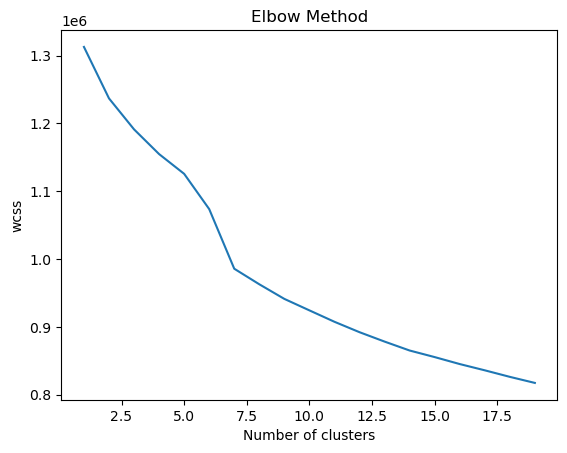

In [33]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i,random_state=0 )
    kmeans.fit(scaled_world_df)
    wcss.append(kmeans.inertia_)
print(wcss)
plt.plot(range(1,20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [34]:
from sklearn.cluster import KMeans
clusters_new = KMeans(3, random_state=0)
clusters_new.fit(scaled_world_df)

KMeans(n_clusters=3, random_state=0)

In [35]:
from sklearn.metrics import silhouette_score
score =silhouette_score(scaled_world_df, clusters_new.labels_, metric='euclidean')
score

0.05200906220746429